# Features selections techniques

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('mobile_dataset.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


# 1.Univariate selections

In [3]:
# Create independent varibales and dependent variables 
X=df.iloc[:,:-1]
y=df['price_range']

In [4]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [5]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [7]:
# import library
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [8]:
#Deifne feature selection
fs=SelectKBest(score_func=chi2,k=20)  
# Applying feature selection
X_selected=fs.fit(X,y)

In [15]:
Selected_score=pd.DataFrame(X_selected.scores_,columns=["Score"])
df_columns= pd.DataFrame(X.columns)


In [23]:
Selected_rank= pd.concat([df_columns,Selected_score],axis=1)
Selected_rank.columns=['Features','Score']
Selected_rank

,Features,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [26]:
# Top 10 features
Selected_rank.nlargest(10,columns="Score").reset_index()

,index,Features,Score
0,13,ram,931267.519053
1,11,px_height,17363.569536
2,0,battery_power,14129.866576
3,12,px_width,9810.586750
4,8,mobile_wt,95.972863
5,6,int_memory,89.839124
6,15,sc_w,16.480319
7,16,talk_time,13.236400
8,4,fc,10.135166
9,14,sc_h,9.614878


# 2. Features importance

This technique gives you a score for each feature of your data,the higher the score mor relevant it is

In [27]:
# import library
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
#Fitting the model
model.fit(X,y)

ExtraTreesClassifier()

In [29]:
model.feature_importances_

array([0.06124735, 0.01928923, 0.03291825, 0.01996692, 0.03260041,
       0.01703572, 0.03505681, 0.03422993, 0.03537938, 0.03258566,
       0.03277476, 0.04703055, 0.04846032, 0.39558778, 0.03381914,
       0.03345855, 0.0347918 , 0.0143523 , 0.01910387, 0.02031126])

In [36]:
#converting to pandas series 
feature_rank=pd.Series(model.feature_importances_,index=X.columns)
# Looking top 10 important features
top_rank=feature_rank.nlargest(10)

<AxesSubplot:>

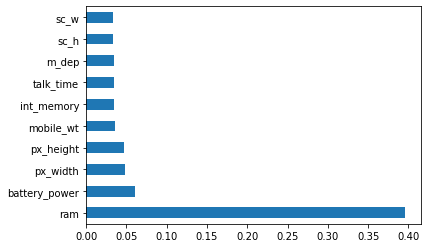

In [37]:
import matplotlib.pyplot as plt
top_rank.plot(kind="barh")

# 3. Correlation

Here We will find correlation of independet features, and independent features should not corrleated to each other

In [40]:
# correlation of independent features
cor=df.iloc[:,:-1].corr()
cor

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964


<AxesSubplot:>

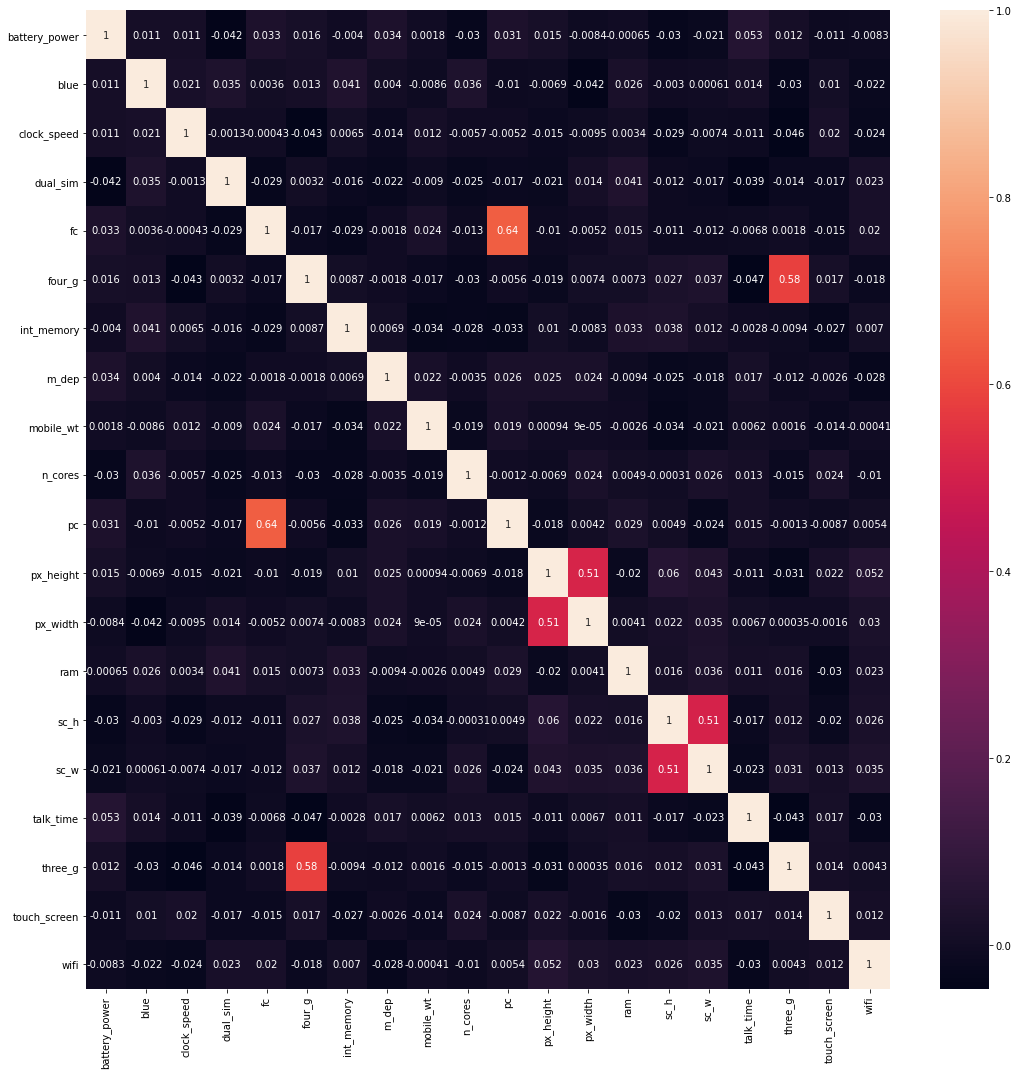

In [43]:
import seaborn as sns
plt.figure(figsize=(18,18))
sns.heatmap(cor,annot=True)

In [46]:
##Removing correlated features
Threshold=0.5 #generally it will considered above 85%

In [47]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [48]:
correlation(df.iloc[:,:-1],Threshold)

{'pc', 'px_width', 'sc_w', 'three_g'}

# 4. Information Gain

In [51]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X,y)
mutual_info

array([0.02937036, 0.        , 0.02110864, 0.        , 0.00218489,
       0.        , 0.        , 0.02827042, 0.01073295, 0.        ,
       0.        , 0.02568049, 0.0283229 , 0.84956281, 0.        ,
       0.00432182, 0.        , 0.        , 0.        , 0.00595713])

In [55]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

ram              0.849563
battery_power    0.029370
px_width         0.028323
m_dep            0.028270
px_height        0.025680
clock_speed      0.021109
mobile_wt        0.010733
wifi             0.005957
sc_w             0.004322
fc               0.002185
int_memory       0.000000
n_cores          0.000000
blue             0.000000
four_g           0.000000
dual_sim         0.000000
sc_h             0.000000
talk_time        0.000000
three_g          0.000000
touch_screen     0.000000
pc               0.000000
dtype: float64